In [1]:
import csv
import pickle

In [2]:
headers = {
    'date': 0,
    'time': 1,
    'id': 2,
    'line': 3,
    'latitude': 4,
    'longitude': 5,
    'speed': 6,
}

In [3]:
buses_ids = set()

def convert_to_dict(row):
    if len(row) == len(headers.keys()):
        date, time, id, line, latitude, longitude, speed = row
        buses_ids.add(id)
        return {
            'date': date,
            'time': time,
            'id': id,
            'line': line,
            'latitude': latitude,
            'longitude': longitude,
            'speed': speed
        }

    return {}


In [4]:
with open('../data/all_buses_2014_10_03.csv', 'r') as csv_file:
    data = csv.reader(csv_file)
    rows = [convert_to_dict(row) for row in data]

In [5]:
id = 'D863340'

mobility_trace = list(filter(lambda row: 'id' in row.keys() and row['id'] == id, rows))

In [6]:
with open(f'../data/{id}.csv', 'wb') as file:
    pickle.dump(mobility_trace, file)

In [7]:
len(mobility_trace)

654

In [8]:
mobility_trace.sort(key=lambda row: row['latitude'])
max_latitude = float(mobility_trace[0]['latitude'] )
min_latitude = float(mobility_trace[-1]['latitude'])

mobility_trace.sort(key=lambda row: row['longitude'])
max_longitude = float(mobility_trace[0]['longitude'])
min_longitude = float(mobility_trace[-1]['longitude'])

In [9]:
def normalize(min, max, value):
    return (float(value) - min)/(max-min)*10.0

In [10]:
def normalize_latitude_and_longitude(row):
    date,time,id,line,latitude,longitude,speed = row.values()
    return {
        'date': date,
        'time': time,
        'id': id,
        'latitude': normalize(min_latitude, max_latitude, latitude),
        'longitude': normalize(min_longitude, max_longitude, longitude),
        'line': line,
        'speed': speed
    }

mobility_trace = sorted(list(map(normalize_latitude_and_longitude, mobility_trace)), key=lambda row: row['time'])

In [11]:
with open(f'../data/{id}_normalized.pickle', 'w') as csv_file:
    csv_file.write(','.join(headers.keys()))
    csv_file.write('\n')
    
    for row in mobility_trace:
        csv_file.write(','.join(map(str, row.values())))
        csv_file.write('\n')

In [12]:
import matplotlib.pyplot as plt

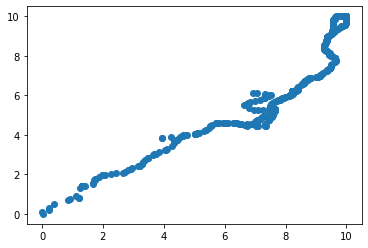

In [13]:
plt.scatter([(lambda row: row['latitude'])(row) for row in mobility_trace], [(lambda row: row['longitude'])(row) for row in mobility_trace])